# Illustration of multi-arm bandit problem
Ie, given k=3 slot machines with different odds of winning, how to you solve the 
explore/exploit problem.  This is solved in the bayesian context.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from BayesBandit import Bandit

In [2]:
def run_experiment(p1,p2,p3,N):
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
    data = np.empty(N)

    for i in xrange(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x

    cumulative_avg_ctr = np.cumsum(data) / (np.arange(N)+1)

    plt.plot(cumulative_avg_ctr)
    plt.plot(np.ones(N) * p1)
    plt.plot(np.ones(N) * p2)
    plt.plot(np.ones(N) * p3)
    plt.ylim((0,1))
    plt.xscale('log')
    plt.show()


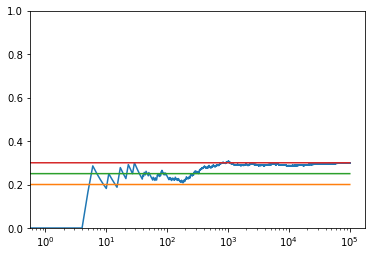

In [3]:
run_experiment(0.2, 0.25, 0.3, 100000)


# Demonstrates convergence of the multi-arm bandit problem to best 'slot machine'